In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

In [ ]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [ ]:
print(df.head())

   id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe  

# Distribution of Wine Ratings


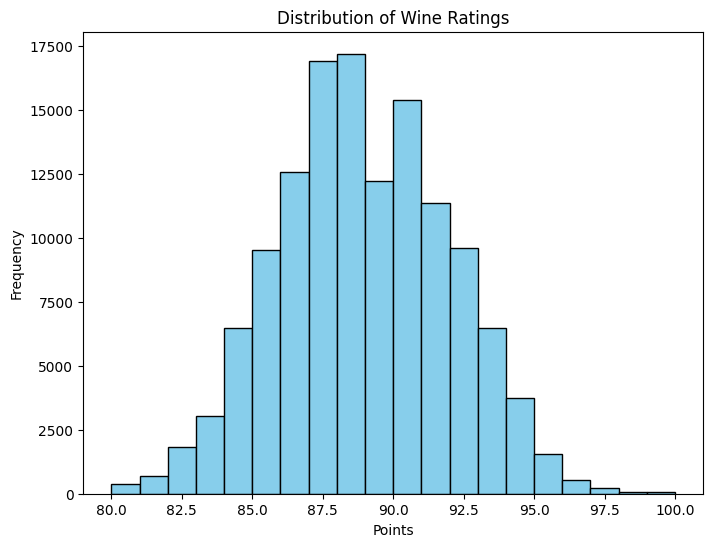

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['points'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Wine Ratings')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Distribution of Wine Prices

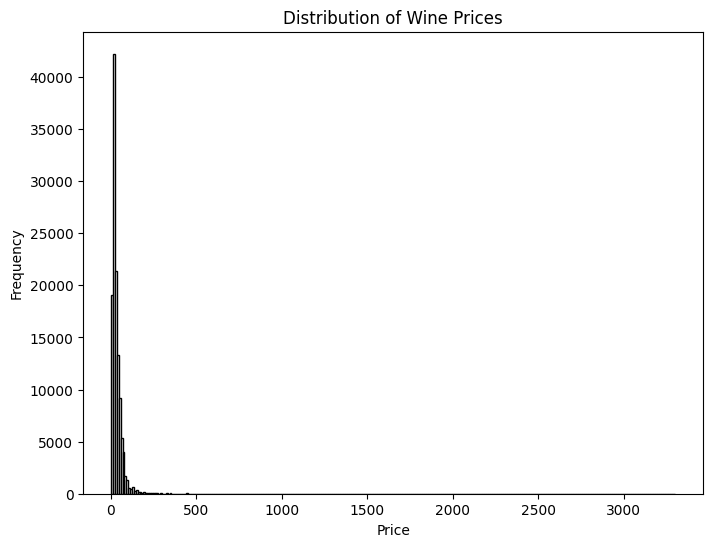

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['price'].dropna(), bins=300, edgecolor='black', color='white')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Graph above—not very helpful :(

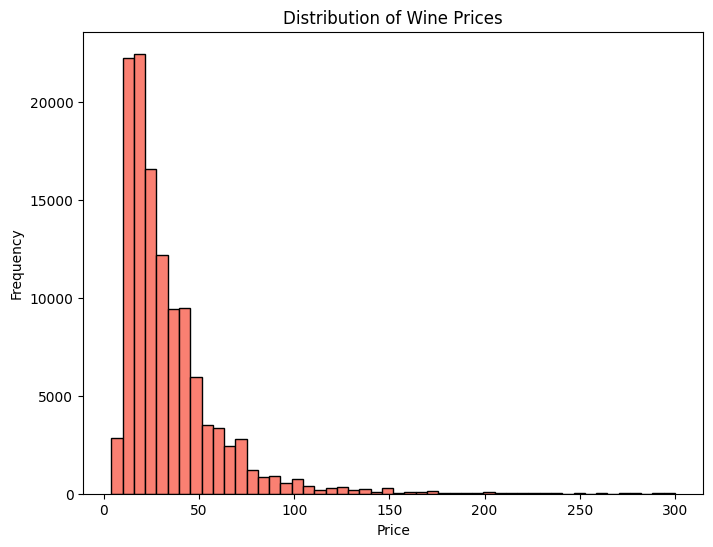

In [ ]:
# Exclude wines over 300
df_300 = df[df['price'] <= 300]

plt.figure(figsize=(8,6))
plt.hist(df_300['price'].dropna(), bins=50, edgecolor='black', color='salmon')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


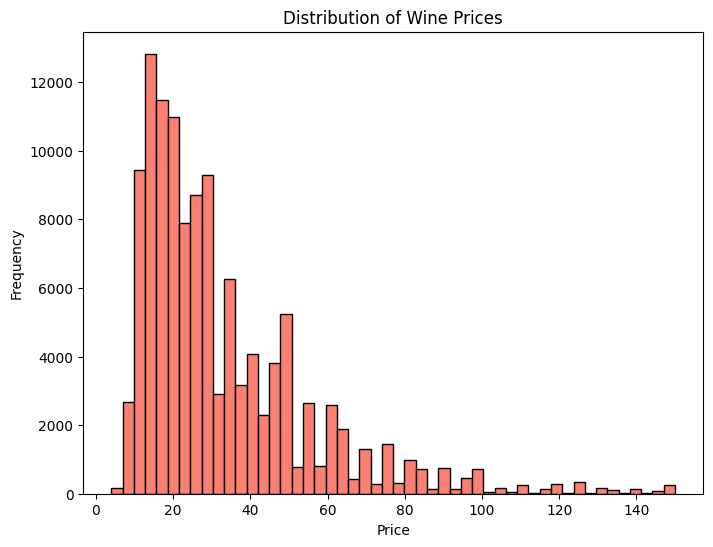

In [ ]:
# Exclude wines over 150
df_100 = df[df['price'] <= 150]

plt.figure(figsize=(8,6))
plt.hist(df_100['price'].dropna(), bins=50, edgecolor='black', color='salmon')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Better :)

# Price vs Rating

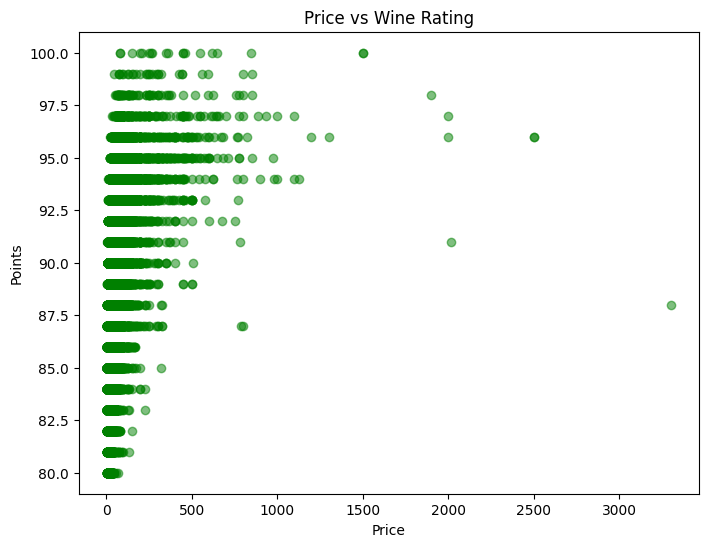

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['points'], alpha=0.5, color='green')
plt.title('Price vs Wine Rating')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

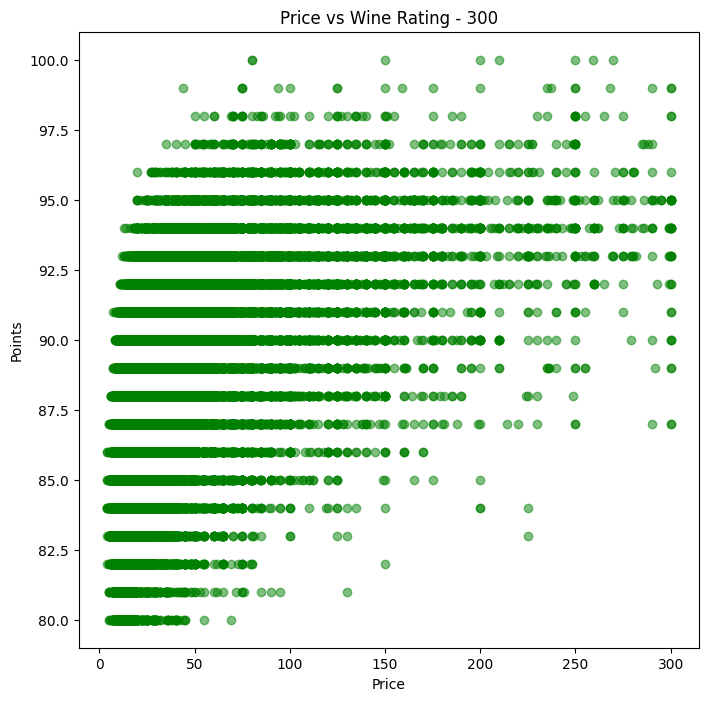

In [ ]:
df_300 = df[df['price'] <= 300]

plt.figure(figsize=(8,8))
plt.scatter(df_300['price'].dropna(), df_300['points'], alpha=0.5, color='green')
plt.title('Price vs Wine Rating - 300')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

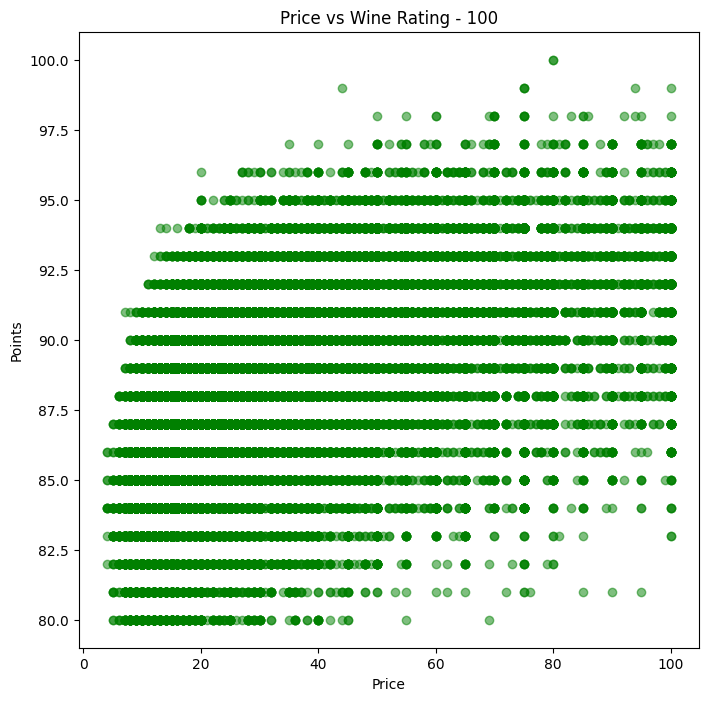

In [ ]:
df_100 = df[df['price'] <= 100]

plt.figure(figsize=(8,8))
plt.scatter(df_100['price'].dropna(), df_100['points'], alpha=0.5, color='green')
plt.title('Price vs Wine Rating - 100')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

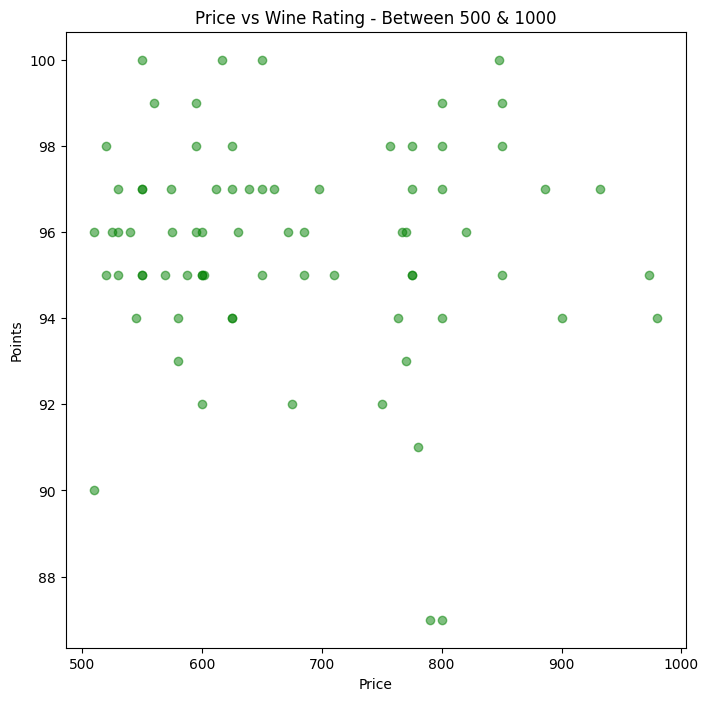

In [ ]:
df_money = df[(df['price'] > 500) & (df['price'] < 1000)]

plt.figure(figsize=(8,8))
plt.scatter(df_money['price'].dropna(), df_money['points'], alpha=0.5, color='green')
plt.title('Price vs Wine Rating - Between 500 & 1000')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

# Top 10 Countries by Number of Reviews

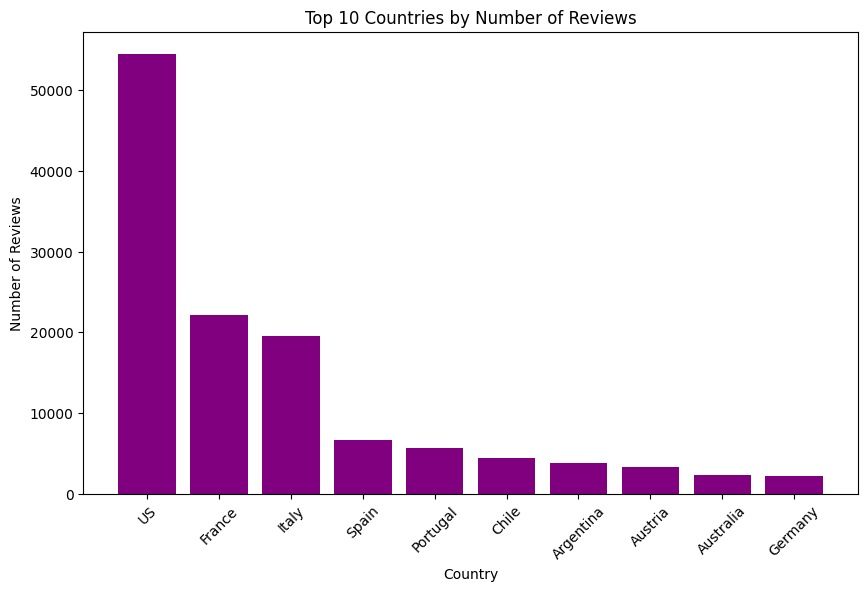

In [ ]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values, color='purple')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Top 10 Wine Varieties

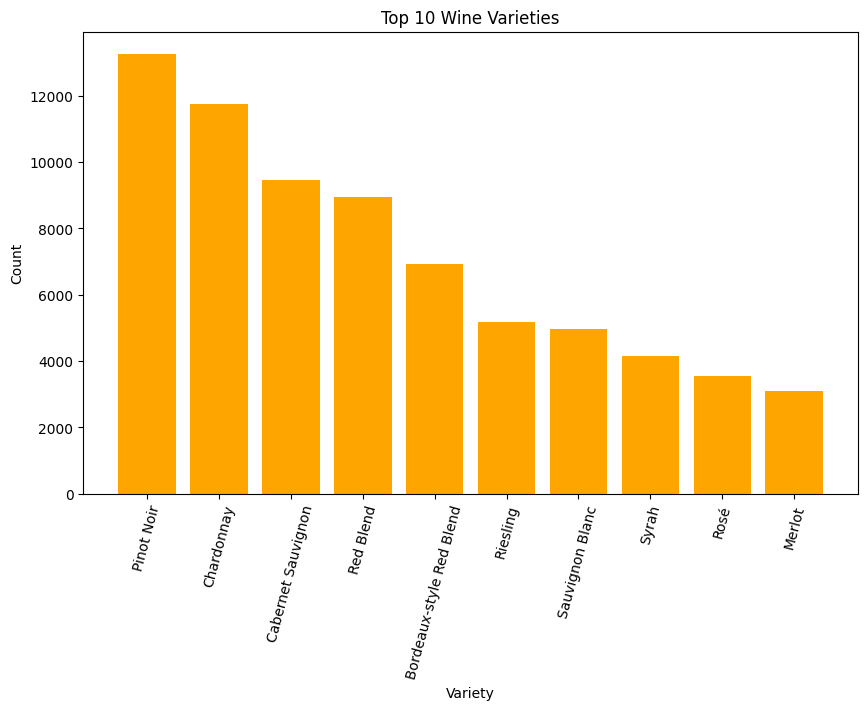

In [ ]:
variety_counts = df['variety'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(variety_counts.index, variety_counts.values, color='orange')
plt.title('Top 10 Wine Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

# Top 10 Varieties by Average Price

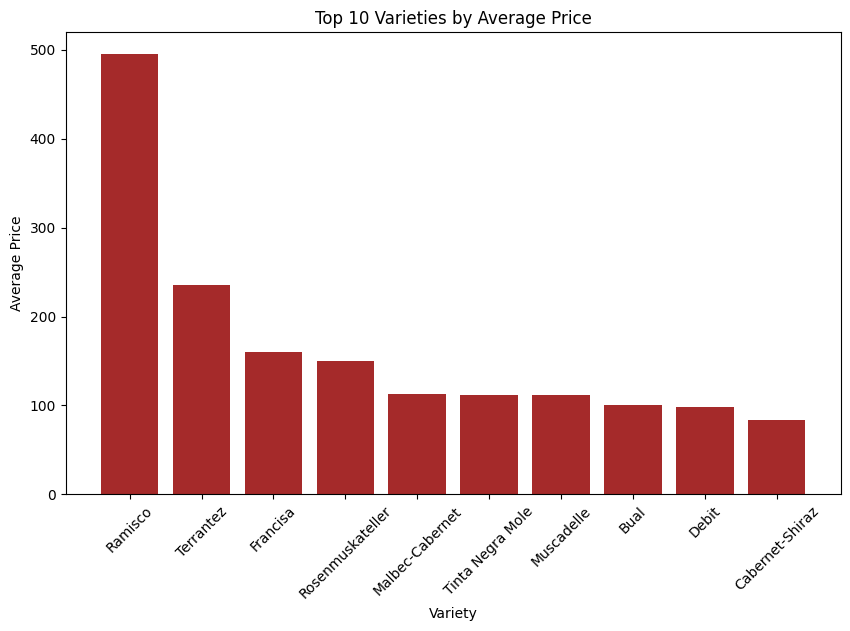

In [ ]:
avg_price_variety = df.groupby('variety')['price'].mean().sort_values(ascending=False).dropna().head(10)
plt.figure(figsize=(10,6))
plt.bar(avg_price_variety.index, avg_price_variety.values, color='brown')
plt.title('Top 10 Varieties by Average Price')
plt.xlabel('Variety')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# WORD CLOUD! :)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

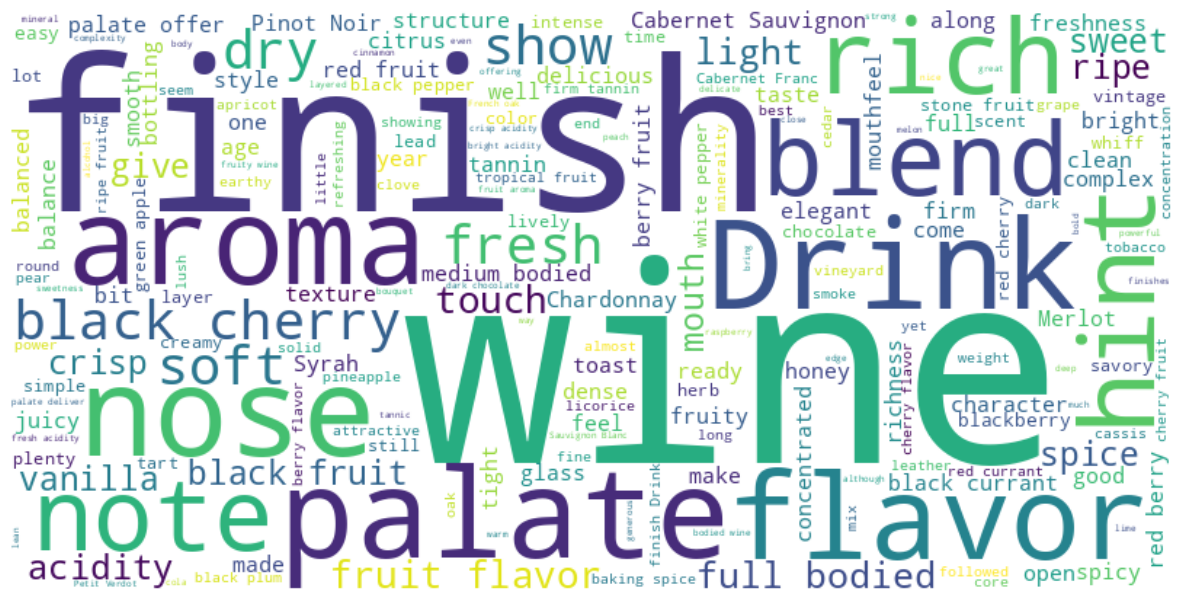

In [ ]:
text = " ".join(description for description in df['description'].dropna())
# Set of stopwords to remove common words
stopwords = set(STOPWORDS).union(set(nltk.corpus.stopwords.words('english')))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Rhône vs Bordeaux

In [ ]:
df_rhone = df[df['province'].str.contains("Rhône", case=False, na=False)]
df_bordeaux = df[df['province'].str.contains("Bordeaux", case=False, na=False)]

In [ ]:
print("Rhone rows:", df_rhone.shape[0])
print("Bordeaux rows:", df_bordeaux.shape[0])

Rhone rows: 1081
Bordeaux rows: 5941


In [ ]:
avg_points_rhone = df_rhone['points'].mean()
avg_points_bordeaux = df_bordeaux['points'].mean()

avg_price_rhone = df_rhone['price'].mean()
avg_price_bordeaux = df_bordeaux['price'].mean()

print(f"Average rating— Rhone: {avg_points_rhone:.2f}")
print(f"Average rating— Bordeaux: {avg_points_bordeaux:.2f}")
print("=====================================================")
print(f"Average price— Rhone: ${avg_price_rhone:.2f}")
print(f"Average price— Bordeaux: ${avg_price_bordeaux:.2f}")

Average rating— Rhone: 89.01
Average rating— Bordeaux: 88.66
Average price— Rhone: $38.64
Average price— Bordeaux: $38.91


<ipython-input-58-55e05d67197b>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


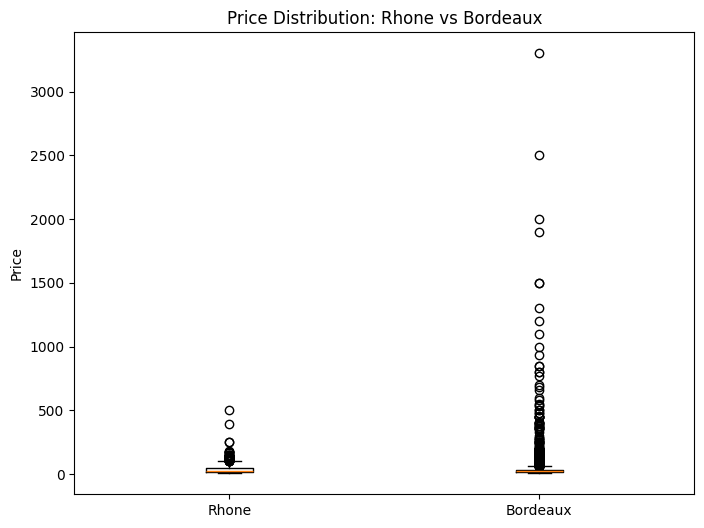

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(
    [df_rhone['price'].dropna(), df_bordeaux['price'].dropna()],
    labels=['Rhone', 'Bordeaux']
)
plt.title('Price Distribution: Rhone vs Bordeaux')
plt.ylabel('Price')
plt.show()

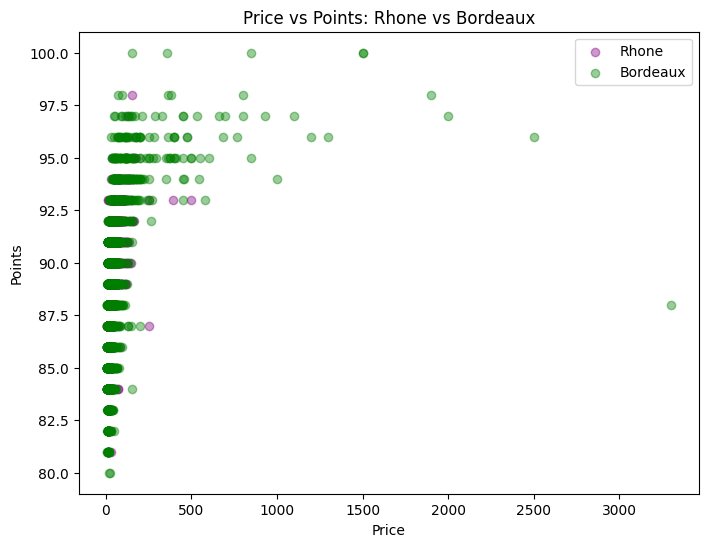

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_rhone['price'], df_rhone['points'], alpha=0.4, label='Rhone', color='purple')
plt.scatter(df_bordeaux['price'], df_bordeaux['points'], alpha=0.4, label='Bordeaux', color='green')
plt.title('Price vs Points: Rhone vs Bordeaux')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()
plt.show()

# Masseto vs Harlan Estate

In [ ]:
df_masseto = df[df['title'].str.contains("Masseto", case=False, na=False)]
df_harlan_estate = df[df['title'].str.contains("Harlan Estate", case=False, na=False)]

In [ ]:
print("Number of Masseto reviews:", len(df_masseto))
print("Number of Harlan Estate reviews:", len(df_harlan_estate))

Number of Masseto reviews: 7
Number of Harlan Estate reviews: 5


In [ ]:
avg_points_masseto = df_masseto['points'].mean()
avg_points_harlan_estate = df_harlan_estate['points'].mean()

avg_price_masseto = df_masseto['price'].mean()
avg_price_harlan_estate = df_harlan_estate['price'].mean()

print(f"Average rating— Masseto: {avg_points_masseto:.2f}")
print(f"Average rating— Harlan Estate: {avg_points_harlan_estate:.2f}")
print("=====================================================")
print(f"Average price— Masseto: ${avg_price_masseto:.2f}")
print(f"Average price— Harlan Estate: ${avg_price_harlan_estate:.2f}")

Average rating— Masseto: 96.71
Average rating— Harlan Estate: 95.00
Average price— Masseto: $466.43
Average price— Harlan Estate: $290.00


<ipython-input-93-1c4e506605bf>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratings_data, labels=wines)


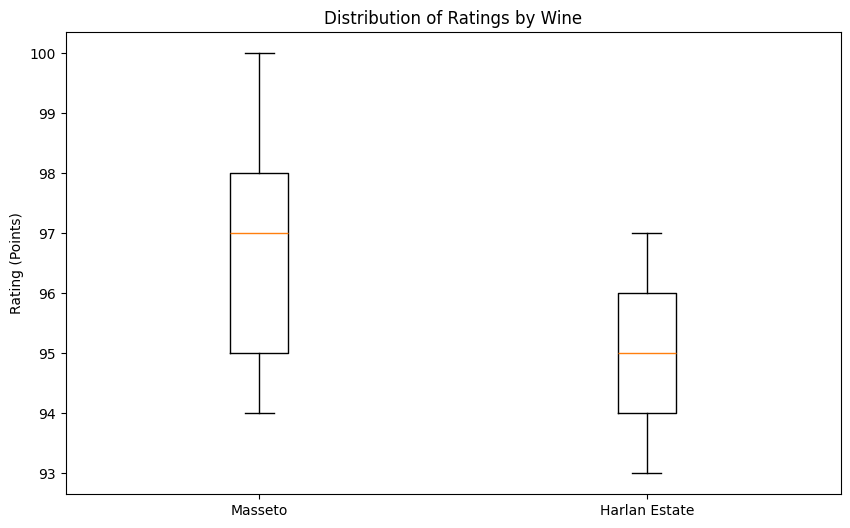

In [ ]:
wines = ['Masseto', 'Harlan Estate']

ratings_data = [df_masseto['points'].dropna(), df_harlan_estate['points'].dropna()]
plt.figure(figsize=(10,6))
plt.boxplot(ratings_data, labels=wines)
plt.title("Distribution of Ratings by Wine")
plt.ylabel("Rating (Points)")
plt.show()

<ipython-input-94-c814f4dd614c>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prices_data, labels=wines)


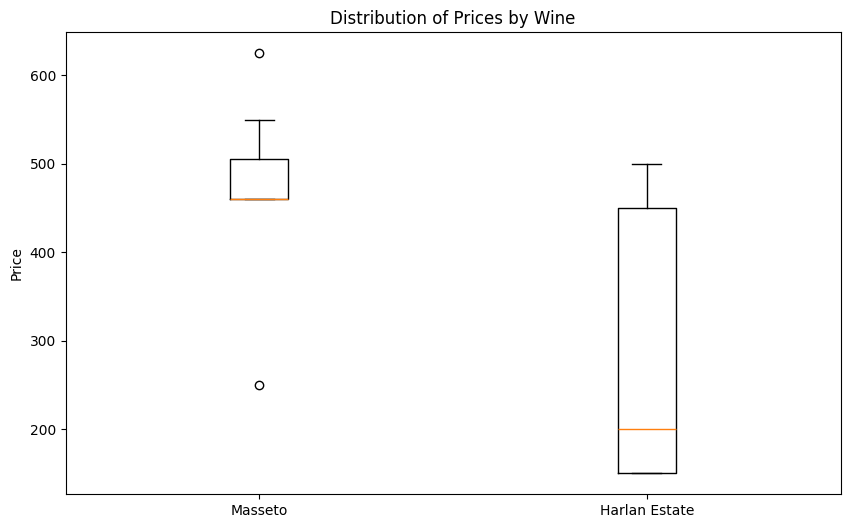

In [ ]:
prices_data = [df_masseto['price'].dropna(), df_harlan_estate['price'].dropna()]
plt.figure(figsize=(10,6))
plt.boxplot(prices_data, labels=wines)
plt.title("Distribution of Prices by Wine")
plt.ylabel("Price")
plt.show()

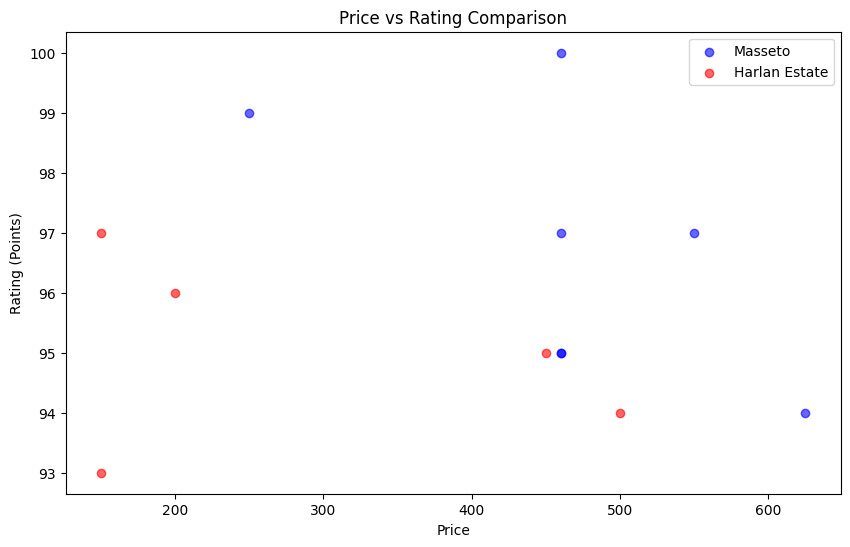

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_masseto['price'], df_masseto['points'], label='Masseto', color='blue', alpha=0.6)
plt.scatter(df_harlan_estate['price'], df_harlan_estate['points'], label='Harlan Estate', color='red', alpha=0.6)
plt.title("Price vs Rating Comparison")
plt.xlabel("Price")
plt.ylabel("Rating (Points)")
plt.legend()
plt.show()